Μοντέλα μηχανικής μάθησης και εμαρφογές για την αξιολόγηση δανειοληπτικού ρίσκου

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [43]:
#import the data 
df = pd.read_csv(r'C:\Users\jlavd\Desktop\loan.csv')
data = pd.DataFrame(df)
data.head(10)

,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,...,Unnamed: 15,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,loan_condition
0,10.0,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,...,NaN,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,0
1,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,...,NaN,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,1
2,10.0,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,...,NaN,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,0
3,10.0,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,...,NaN,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,0
4,1.0,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,...,NaN,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,0
5,3.0,RENT,1,Low,36000,1,5000,36 months,1,INDIVIDUAL,...,NaN,7.90,A,1,11.20,5631.377753,5000.00,0.00,156.46,0
6,8.0,RENT,1,Low,47004,1,7000,60 months,2,INDIVIDUAL,...,NaN,15.96,C,3,23.51,8136.840000,5110.85,0.00,170.08,0
7,9.0,RENT,1,Low,48000,1,3000,36 months,1,INDIVIDUAL,...,NaN,18.64,E,5,5.35,3938.144334,3000.00,0.00,109.43,0
8,4.0,OWN,2,Low,40000,1,5600,60 months,2,INDIVIDUAL,...,NaN,21.28,F,6,5.55,646.020000,162.02,189.06,152.39,1
9,0.5,RENT,1,Low,15000,1,5375,60 months,2,INDIVIDUAL,...,NaN,12.69,B,2,18.08,1476.190000,673.48,269.29,121.45,1


In [44]:
#Preprocess the data
data.describe()


,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,Unnamed: 15,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,loan_condition
count,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,0.0,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,NaN,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127,0.075987
std,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,NaN,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593,0.264977
min,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,NaN,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000,0.000000
25%,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,NaN,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000,0.000000
50%,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,NaN,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000,0.000000
75%,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,NaN,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000,0.000000
max,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,NaN,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000,1.000000


In [45]:
#Split the data
X = data.drop(columns=['loan_condition', 'home_ownership', 'income_category', 'term', 'application_type', 'interest_payments',
                      'purpose', 'grade', 'Unnamed: 15'])

y = data['loan_condition']

#Train(70%) and test data(30%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)



In [47]:
#We run the first algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Decision Tree 
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_test)
 
Decision_tree_cnf_matrix = metrics.confusion_matrix(y_test, d_tree_pred)

print('Decision Tree Confusion matrix:')
print(Decision_tree_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, d_tree_pred))
print('Precision:',metrics.precision_score(y_test, d_tree_pred))
print('Recall:',metrics.recall_score(y_test, d_tree_pred))

#Logistic Regression
log_regression_model = LogisticRegression()
log_regression_model.fit(X_train,y_train)
log_regression_prediction = log_regression_model.predict(X_test)

log_regression_cnf_matrix = metrics.confusion_matrix(y_test, log_regression_prediction)

#confusion matrix

print('Logistic Regression Confusion matrix:')
print(log_regression_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, log_regression_prediction))
print('Precision:',metrics.precision_score(y_test, log_regression_prediction))  #PRECISION: poso akrives einai to montelo, dhl poso suxna h provlepsh einai swsth
print('Recall:',metrics.recall_score(y_test, log_regression_prediction))  #RECALL: an to sto modelo uparxoun bad loans sto test set


Decision Tree Confusion matrix:
[[237294   8604]
 [  7590  12726]]
Accuracy score: 0.9391692397845343
Precision: 0.5966244725738397
Recall: 0.6264028352037803


C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Confusion matrix:
[[245638    260]
 [ 13179   7137]]
Accuracy score: 0.9495180569015904
Precision: 0.9648506151142355
Recall: 0.3512994683992912


Good numbers are observed but there is a big difference in TP,TN,FP,FN. 
So there is more "good loan" data compared to "Bad loan". So we have to work with equal numbers to see if the predictions are accurate.

In [48]:
#We get an equal number of random data. 
good_loan_0 = data[data['loan_condition'] == 0]
bad_loan_1 = data[data['loan_condition'] == 1]

random_good_loan_0 = good_loan_0.sample(n=15000)
random_bad_loan_1 = bad_loan_1.sample(n=15000)

small_dataset = pd.concat([random_good_loan_0,random_bad_loan_1 ])

#Split the new data
X = small_dataset.drop(columns=['loan_condition', 'home_ownership', 'income_category', 'term', 'application_type', 'interest_payments',
                      'purpose', 'grade', 'Unnamed: 15'])

y = small_dataset['loan_condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)



Precision = TP/(TP+FP) What proportion of positive identifications was actually correct?
Recall = TP/(TP+FN) What proportion of actual positives was identified correctly

C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion matrix:
[[245638    260]
 [ 13179   7137]]
Accuracy score: 0.7418888888888889
Precision: 0.8034260039314799
Recall: 0.6380463871543265
10-fold: 	
 [0.74433333 0.74266667 0.737      0.747      0.754      0.73133333
 0.751      0.75233333 0.74266667 0.73766667]


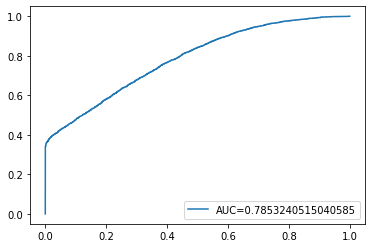

In [52]:
#logistic Regression
from sklearn.linear_model import LogisticRegression


log_regression_model = LogisticRegression()
log_regression_model.fit(X_train,y_train)
log_regression_prediction = log_regression_model.predict(X_test)

log_regression_cnf_matrix = metrics.confusion_matrix(y_test, log_regression_prediction)
kfold = cross_val_score(log_regression_model,X,y,cv=10)

print(log_regression_model)
print('Confusion matrix:')
print(cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, log_regression_prediction))
print('Precision:',metrics.precision_score(y_test, log_regression_prediction))
print('Recall:',metrics.recall_score(y_test, log_regression_prediction))
print('10-fold: \t\n',kfold)
    
y_pred_proba = regression_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)  #ROC: einai mia grafikh anaparastash tou true posotive enanti tou false positive. deixnei thn antallagh metaksu specificity kai sensitivity
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)  #loc= se poio tetarthmorio na emfaniseti o titlos tou grafhmatos
plt.show()

In [54]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_test)
kfold = cross_val_score(log_regression_model,X,y,cv=10) 
Decision_tree_cnf_matrix = metrics.confusion_matrix(y_test, d_tree_pred)

print('Decision Tree Confusion matrix:')
print(Decision_tree_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, d_tree_pred))
print('Precision:',metrics.precision_score(y_test, d_tree_pred))
print('Recall:',metrics.recall_score(y_test, d_tree_pred))
print('10-fold: \t\n',kfold)

C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jlavd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Decision Tree Confusion matrix:
[[3375 1141]
 [1209 3275]]
Accuracy score: 0.7388888888888889
Precision: 0.7416213768115942
Recall: 0.7303746654772525
10-fold: 	
 [0.74433333 0.74266667 0.737      0.747      0.754      0.73133333
 0.751      0.75233333 0.74266667 0.73766667]


In [58]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
kfold = cross_val_score(KNN,X,y,cv=10) 
KNN_cnf_matrix = metrics.confusion_matrix(y_test, KNN_pred)

print('Decision Tree Confusion matrix:')
print(KNN_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, KNN_pred))
print('Precision:',metrics.precision_score(y_test, KNN_pred))
print('Recall:',metrics.recall_score(y_test, KNN_pred))
print('10-fold: \t\n',kfold)

Decision Tree Confusion matrix:
[[3007 1509]
 [1643 2841]]
Accuracy score: 0.6497777777777778
Precision: 0.6531034482758621
Recall: 0.6335860838537021
10-fold: 	
 [0.65733333 0.64266667 0.65966667 0.63933333 0.64633333 0.64166667
 0.665      0.65766667 0.646      0.64933333]


In [62]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
kfold = cross_val_score(forest,X,y,cv=10) 
forest_cnf_matrix = metrics.confusion_matrix(y_test, forest_pred)

print('Decision Tree Confusion matrix:')
print(forest_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, forest_pred))
print('Precision:',metrics.precision_score(y_test, forest_pred))
print('Recall:',metrics.recall_score(y_test, forest_pred))
print('10-fold: \t\n',kfold)

#Which feature is most important
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
print('\n')
print(values)

Decision Tree Confusion matrix:
[[3656  860]
 [1140 3344]]
Accuracy score: 0.7777777777777778
Precision: 0.7954329210275928
Recall: 0.7457627118644068
10-fold: 	
 [0.77633333 0.77866667 0.775      0.783      0.768      0.77266667
 0.78666667 0.78633333 0.77866667 0.78033333]


[('recoveries', 0.18824490070254288), ('total_rec_prncp', 0.13435970746237796), ('interest_rate', 0.11950027168024557), ('total_pymnt', 0.10036680445553105), ('installment', 0.08825486806266902), ('dti', 0.08115686238543243), ('annual_inc', 0.07288158068541109), ('loan_amount', 0.07089062046070795), ('emp_length_int', 0.04127221238283747), ('grade_cat', 0.025215643901401793), ('purpose_cat', 0.025056523762260866), ('interest_payment_cat', 0.023353021384937604), ('home_ownership_cat', 0.015797111926967596), ('term_cat', 0.008161925662134108), ('income_cat', 0.005405182257252212), ('application_type_cat', 8.276282729033128e-05)]


Text(0.5, 257.44, 'Predicted label')

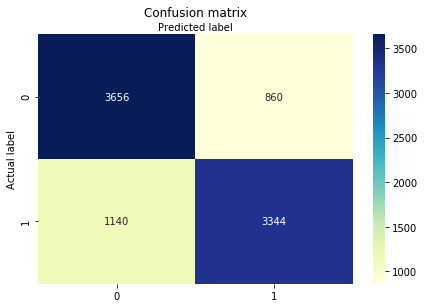

In [72]:
import seaborn as sns
#grafikh apeikonish confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(forest_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
#Naive Bayes Bernoulli Distribution(0,1)
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB(binarize=True)
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)
kfold = cross_val_score(bayes,X,y,cv=10) 
bayes_cnf_matrix = metrics.confusion_matrix(y_test, forest_pred)

print('Decision Tree Confusion matrix:')
print(bayes_cnf_matrix)
print('Accuracy score:',accuracy_score(y_test, bayes_pred))
print('Precision:',metrics.precision_score(y_test, bayes_pred))
print('Recall:',metrics.recall_score(y_test, bayes_pred))
print('10-fold: \t\n',kfold)

Decision Tree Confusion matrix:
[[3651  865]
 [1148 3336]]
Accuracy score: 0.6871111111111111
Precision: 0.6713933415536375
Recall: 0.7285905441570026
10-fold: 	
 [0.71       0.69       0.68766667 0.684      0.69233333 0.68466667
 0.688      0.69966667 0.674      0.693     ]


Random Forest had the best results 